## Introduction to Statistical Learning Chapter 10 Excercise 9
### Consider the USArrests data. We will now perform hierarchical clustering on the states.

### 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

### 2. Data processing and cleaning

In [3]:
data= pd.read_csv("USArrest.csv")
X= data.iloc[:,1:]

### 3. Questions

### (a) Using hierarchical clustering with complete linkage and Euclidean distance, cluster the states. 

### (b) Cut the dendrogram at a height that results in three distinct clusters. 
        See red dotted line at y= 150 in the dendrogram below


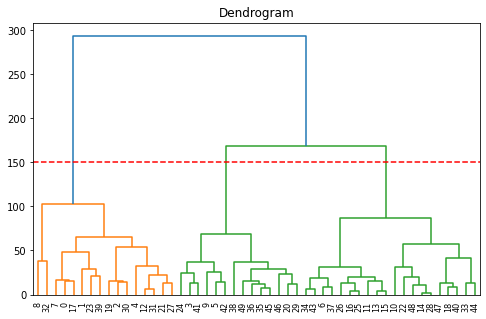

In [24]:
plt.figure(figsize=(8,5))  
plt.title("Dendrogram") 
linkage_matrix = shc.linkage(X, method='complete',metric = 'euclidean') 
dend = shc.dendrogram(linkage_matrix)
plt.axhline(y = 150,c = 'red',linestyle = '--')

In [5]:
clustering_res = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean').fit_predict(X)
data['Cluster']= clustering_res
cluster_dict = {}
for i in data['Cluster'].unique():
   cluster_dict[i] = data[data['Cluster']==i]['State'].to_list()

###       Which states belong to which clusters?

#### In Cluster 1, the states are:

In [6]:
print("The number of states in this cluster :",len(cluster_dict[0]),"\n")
print(cluster_dict[0])

The number of states in this cluster : 16 

['Alabama', 'Alaska', 'Arizona', 'California', 'Delaware', 'Florida', 'Illinois', 'Louisiana', 'Maryland', 'Michigan', 'Mississippi', 'Nevada', 'New Mexico', 'New York', 'North Carolina', 'South Carolina']


#### In Cluster 2, the states are:

In [7]:
print("The number of states in this cluster :",len(cluster_dict[1]),"\n")
print(cluster_dict[1])

The number of states in this cluster : 20 

['Connecticut', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'Ohio', 'Pennsylvania', 'South Dakota', 'Utah', 'Vermont', 'West Virginia', 'Wisconsin']


#### In Cluster 3, the states are:

In [65]:
print("The number of states in this cluster :",len(cluster_dict[2]),"\n")
print(cluster_dict[2])

The number of states in this cluster : 14 

['Arkansas', 'Colorado', 'Georgia', 'Massachusetts', 'Missouri', 'New Jersey', 'Oklahoma', 'Oregon', 'Rhode Island', 'Tennessee', 'Texas', 'Virginia', 'Washington', 'Wyoming']


### (c) Hierarchically cluster the states using complete linkage and Euclidean distance, after scaling the variables to have standard deviation one.

In order to obtain 3 clusters, the dissimilarity threshold is now set at 4.4583.
The dendrogram below is scaled up vertically to show this threshold.

In [9]:
scaler = StandardScaler()
scaler.fit(X)
# Question only asks for ensuring std dev of 1, and not to demean the features
X_scaled = X / np.sqrt( np.array( scaler.var_) )

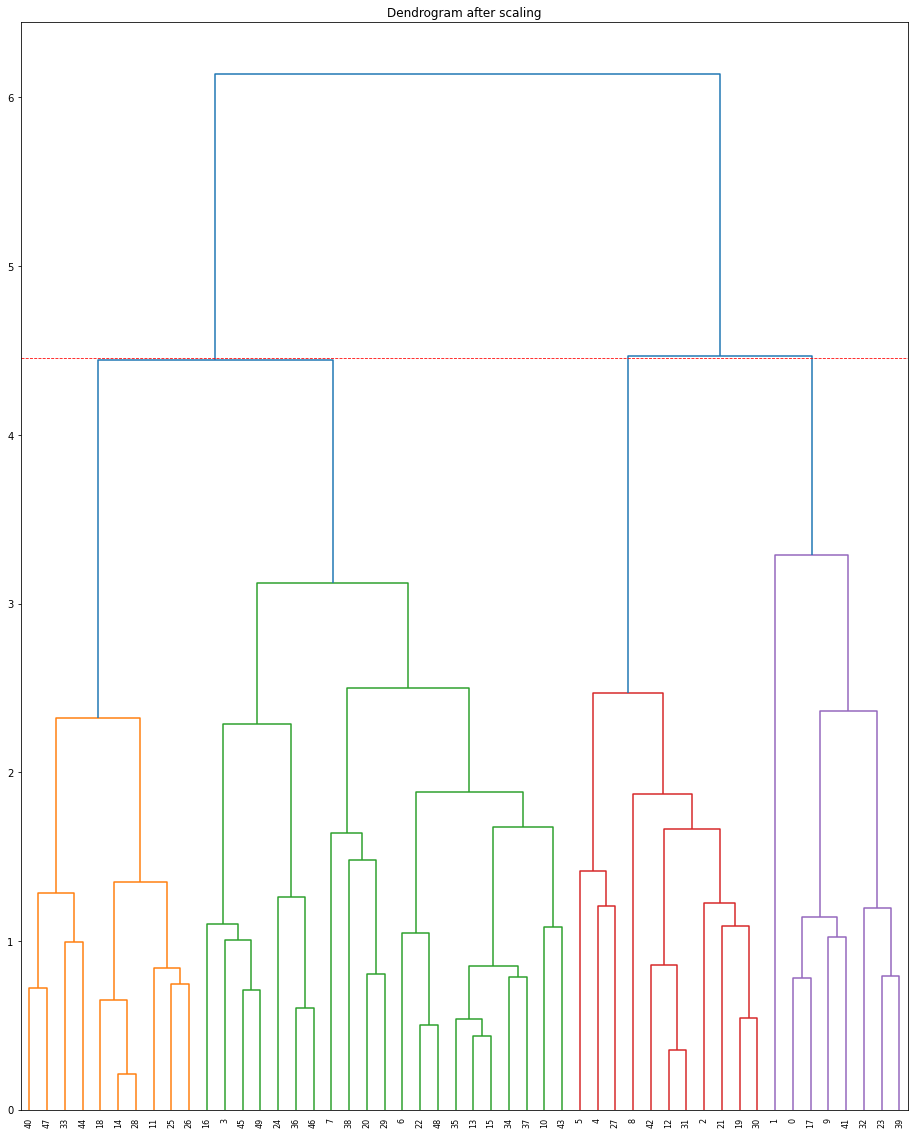

In [78]:
plt.figure(figsize=(35, 20))  
plt.subplot(1,2,1)
plt.title("Dendrogram after scaling") 
linkage_matrix = shc.linkage(X_scaled, method='complete',metric = 'euclidean') 
dend = shc.dendrogram(linkage_matrix)
plt.axhline(y = 4.4583,c = 'red',linestyle = '--',linewidth=0.8)


### d) What effect does scaling the variables have on the hierarchical clustering obtained? In your opinion, should the variables be scaled before the inter-observation dissimilarities are computed? Provide a justification for your answer.

Scaling the variables seemed to have help to obtain more meaningful cluster, for example, the states in second cluster such as Alabama, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee which are contiguous states in the Southern states in the US.

While states in third cluster such as Arizona, California, Colorado, Nevada, New Mexico, Texas corresponds to the states in Southwestern US.

Yes the variables should be scaled before the dissimilarity is computed, scaling allows each of the features to take on similar range of values but centered at different mean. This will help each of the feature to contribute at equal proportion to the dissimilarity measure that is computed later.

### The states in each clusters after scaling

In [45]:
clustering_res = AgglomerativeClustering(n_clusters=3, linkage='complete', affinity='euclidean').fit_predict(X_scaled)
data['Cluster']= clustering_res
cluster_dict = {}
for i in data['Cluster'].unique():
   cluster_dict[i] = data[data['Cluster']==i]['State'].to_list()

#### States in the first cluster

In [48]:
print("The number of states in this cluster :",len(cluster_dict[0]),"\n")
print(cluster_dict[0])

The number of states in this cluster : 31 

['Arkansas', 'Connecticut', 'Delaware', 'Hawaii', 'Idaho', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Maine', 'Massachusetts', 'Minnesota', 'Missouri', 'Montana', 'Nebraska', 'New Hampshire', 'New Jersey', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']


#### States in the second cluster

In [47]:
print("The number of states in this cluster :",len(cluster_dict[1]),"\n")
print(cluster_dict[1])

The number of states in this cluster : 8 

['Alabama', 'Alaska', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']


#### States in the third cluster

In [49]:
print("The number of states in this cluster :",len(cluster_dict[2]),"\n")
print(cluster_dict[2])

The number of states in this cluster : 11 

['Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Nevada', 'New Mexico', 'New York', 'Texas']
